## Reference

[1] [輕鬆學會網路爬蟲，教你用Python爬蟲爬大樂透, Eric Jhang](https://ericjhang.github.io/archives/dad03d64.html)

## 大樂透網頁
要進行爬蟲前，最好先人工理解想要爬蟲的目標網頁內容，[台彩大樂透](https://www.taiwanlottery.com.tw/Lotto/Lotto649/history.aspx)
台彩大樂透網頁，用 Chrome 進入此頁面，按下 ``F12`` 就可以看到以下頁面


### 依序點擊

 - ```Network```
 - ```Doc```
 - 左邊列表 ```history.aspx```
 - (a) 找出 ```url```
 - (b) 檢查 Request Method is ```get``` or ``` post ```?

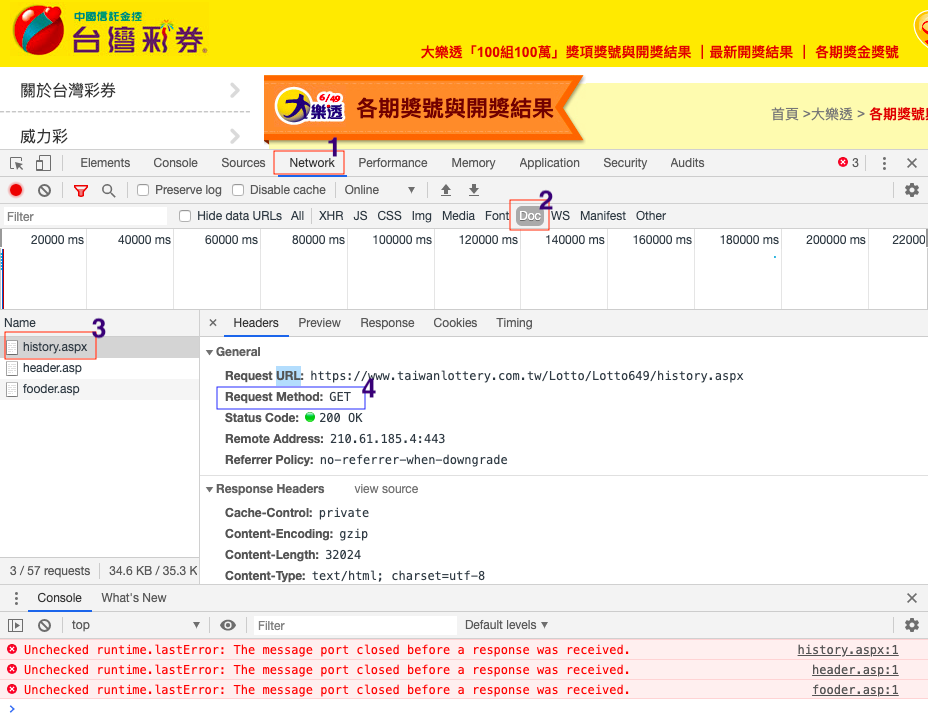

In [1]:
%matplotlib inline
from PIL import Image
Image.open("./dataset/check_request_method.png")

In [2]:
import requests
from bs4 import BeautifulSoup
import re

url = 'https://www.taiwanlottery.com.tw/Lotto/Lotto649/history.aspx'

res = requests.get(url, timeout = 30)

In [3]:
print(res.text)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
    <meta http-equiv="X-UA-Compatible" content="IE=EmulateIE8"/>
    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
    <title>大樂透 各期獎號與開獎結果</title>
  <link href="/css1.css" rel="stylesheet" type="text/css" /> 
 <script type="text/JavaScript">

<!--

     if (navigator.appName.indexOf("Internet Explorer") != -1)

         document.onmousedown = noSourceExplorer;

     function noSourceExplorer() {

         if (event.button == 2 | event.button == 3) {

             alert("版權所有 台灣彩券");

             //location.replace("http://www.taiwanlottery.com.tw/");

         }

     }

-->

</script>  
</head>


<body>
    <form method="post" action="./history.aspx" id="form1">
<input type="hidden" name="__VIEWSTATE" id="__VIEWSTATE" value="qqT4wjrVN1f/MRNSizPBptLHySkALu7bAGntyHUN5XQpD9qOTgPzZ+EGO3keoZw

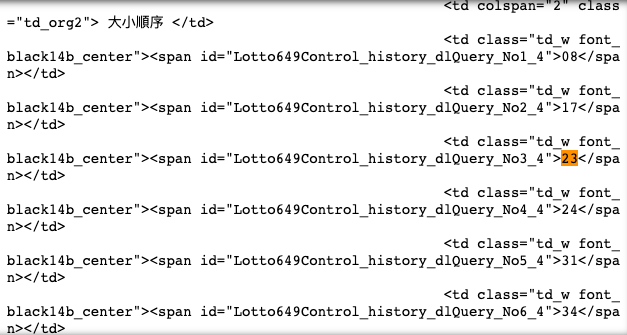

In [4]:
Image.open("./dataset/lottery_eg1.png")

由關鍵的格式為

```
<span id="Lotto649Control_history_dlQuery_No1_2">10</span>
```

因此想法上，我們將分成兩個部份來處理:
 - 大部分解
 - 細部分解

*** 
### 大部分解
先萃取並收集網頁內有 Lotto649Control_history_dlQuery_No1_ 等資訊，因此在程式中
我們要把所有獎號的id用一個List記錄起來，到時候讓soup.find_all 去找符合id並收集起來即可

In [13]:
winning_Numbers_Sort_lotto = ['Lotto649Control_history_dlQuery_No1_','Lotto649Control_history_dlQuery_No2_','Lotto649Control_history_dlQuery_No3_','Lotto649Control_history_dlQuery_No4_','Lotto649Control_history_dlQuery_No5_','Lotto649Control_history_dlQuery_No6_','Lotto649Control_history_dlQuery_SNo_']


def search_winner_number(css_class):
#    globel winning_Numbers_Sort_lotto:
    if(css_class != None):
        for i in range( len(winning_Numbers_Sort_lotto) ):
            if winning_Numbers_Sort_lotto[i] in css_class:
                return css_class

            
res = requests.get(url)
# print(res1.text)

soup = BeautifulSoup(res.text, 'lxml')
# print(soup2.prettify())
header_Info = soup.find_all(id = search_winning_numbers) # This is a function

In [14]:
for item in header_Info:
    print(item)

<span id="Lotto649Control_history_dlQuery_No1_0">10</span>
<span id="Lotto649Control_history_dlQuery_No2_0">21</span>
<span id="Lotto649Control_history_dlQuery_No3_0">23</span>
<span id="Lotto649Control_history_dlQuery_No4_0">33</span>
<span id="Lotto649Control_history_dlQuery_No5_0">42</span>
<span id="Lotto649Control_history_dlQuery_No6_0">48</span>
<span id="Lotto649Control_history_dlQuery_SNo_0">41</span>
<span id="Lotto649Control_history_dlQuery_No1_1">02</span>
<span id="Lotto649Control_history_dlQuery_No2_1">09</span>
<span id="Lotto649Control_history_dlQuery_No3_1">12</span>
<span id="Lotto649Control_history_dlQuery_No4_1">15</span>
<span id="Lotto649Control_history_dlQuery_No5_1">20</span>
<span id="Lotto649Control_history_dlQuery_No6_1">49</span>
<span id="Lotto649Control_history_dlQuery_SNo_1">40</span>
<span id="Lotto649Control_history_dlQuery_No1_2">10</span>
<span id="Lotto649Control_history_dlQuery_No2_2">21</span>
<span id="Lotto649Control_history_dlQuery_No3_2">25</spa

## 細部分解
 - 細部分解在大部分解之後，繼續萃取我們需要的資訊
 - 這邊需要用到 css一種格式
 - 從以下可以看到 夾住的資訊是 10
 - 因此程式中僅需要取 .text 這種方式即可取得獎號


```
<span id="Lotto649Control_history_dlQuery_No1_0">10</span>
```

In [20]:
def parse_tw_lotto_html(data_Info,number_count):  
    data_Info_List = []
    data_Info_Dict = {}
    tmp_index = 0
    for index  in range(len(data_Info)) :
        if (index == 0):
            data_Info_List.append(data_Info[index].text)  
        else:
            if(index % number_count != 0):
                data_Info_List.append(data_Info[index].text)
            else:
                data_Info_Dict[str(tmp_index)] = list(data_Info_List)
                data_Info_List= []
                data_Info_List.append(data_Info[index].text)
                tmp_index = tmp_index+1
        data_Info_Dict[str(tmp_index)] = list(data_Info_List)
    return data_Info_List,data_Info_Dict       

In [21]:
url ='http://www.taiwanlottery.com.tw/Lotto/Lotto649/history.aspx'

res = requests.get(url, timeout = 10)

soup = BeautifulSoup(res.text,'lxml')

header_Info = soup.find_all(id = search_winning_numbers)

data_Info_List,data_Info_Dict  = parse_tw_lotto_html(header_Info,7)    

print(data_Info_Dict)

{'0': ['10', '21', '23', '33', '42', '48', '41'], '1': ['02', '09', '12', '15', '20', '49', '40'], '2': ['10', '21', '25', '26', '35', '37', '04'], '3': ['02', '16', '18', '20', '22', '39', '21'], '4': ['08', '17', '23', '24', '31', '34', '25'], '5': ['12', '18', '29', '40', '41', '48', '24'], '6': ['02', '07', '15', '27', '37', '39', '43'], '7': ['03', '12', '17', '20', '29', '38', '47'], '8': ['02', '14', '19', '20', '26', '43', '23'], '9': ['11', '13', '25', '32', '33', '48', '31']}


In [22]:
# dict transfer to DataFrame
import pandas as pd

df = pd.DataFrame(data_Info_Dict)

In [23]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9
0,10,02,10,02,08,12,02,03,02,11
1,21,09,21,16,17,18,07,12,14,13
2,23,12,25,18,23,29,15,17,19,25
3,33,15,26,20,24,40,27,20,20,32
4,42,20,35,22,31,41,37,29,26,33
5,48,49,37,39,34,48,39,38,43,48
6,41,40,04,21,25,24,43,47,23,31
